# DA Final project:

# Obesity

###  Name of students:

##### Lavi Tal
##### Omeisy Nadav
##### Peretz Nitzan

<div>
<img src = "https://github.com/omeysi1/project1/blob/main/IMG_8873.jpg?raw=true" width="900"/> 
</div>




# <b id="section_2">  </b> <b style='color:#F05454'>1. Relevant libraries </b> <b></b> 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import numpy as np
import requests
from IPython.display import Image

# <b id="section_2">  </b> <b style='color:#F05454'>2. dtypes & info </b> <b></b> 

#### Information on the data
The target of our project is to Know what are the factors that influence obesity in order to know what to avoid  <br>taken from [Kaggle](https://www.kaggle.com/datasets/muhramasaputra/obesity-based-on-eating-habits-and-physical-cond)

In [2]:
url = 'https://raw.githubusercontent.com/omeysi1/project1/main/obesity.csv'
ob_df = pd.read_csv(url)
ob_df.shape

(2111, 19)

In [3]:
ob_df.columns

Index(['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC',
       'Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking',
       'NObeyesdad'],
      dtype='object')

In [4]:
ob_df

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,0,0,0,1,0,0
1,0,21.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,0,0,0,1,0,0
2,1,23.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,0,0,0,1,0,0
3,1,27.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,0,0,0,0,1,0
4,1,22.000000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,0,0,0,1,0,1
2107,0,21.982942,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,0,0,0,1,0,1
2108,0,22.524036,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,0,0,0,1,0,1
2109,0,24.361936,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,0,0,0,1,0,1


In [5]:
ob_df.isnull().sum()

Gender                            0
Age                               0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
Automobile                        0
Bike                              0
Motorbike                         0
Public_Transportation             0
Walking                           0
NObeyesdad                        0
dtype: int64

In [6]:
ob_df.dtypes

Gender                              int64
Age                               float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                                int64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int64
Automobile                          int64
Bike                                int64
Motorbike                           int64
Public_Transportation               int64
Walking                             int64
NObeyesdad                          int64
dtype: object

In [7]:
len(ob_df)

2111

# <b id="section_2">  </b> <b style='color:#F05454'>Observation 1 </b> <b></b> 

In [8]:
ob_df['family_history_with_overweight'].value_counts()

family_history_with_overweight
1    1726
0     385
Name: count, dtype: int64

In [9]:
ob_df.groupby('family_history_with_overweight')[['NObeyesdad']].sum()

,NObeyesdad
family_history_with_overweight,
0,8
1,964


כאשר בחנו את נתוני הקובץ, עניין אותנו לדעת כמה השפעה יש להיסטורייה המשפחתית של הנבדק. כאשר בדקנו כמה אנשים מתוך בעלי ההיסטוריה המשפחתית של השמנת יתר מאובחנים גם הם בהשמנת יתר וכמה אנשים שאינם בעלי היסטוריה משפחתית מאובחנים בהשמנת יתר ראינו כי ההבדלים ביחסים ניכרים. 

In [10]:
with_family_history = ob_df[ob_df['family_history_with_overweight'] == 1]
without_family_history = ob_df[ob_df['family_history_with_overweight'] == 0]

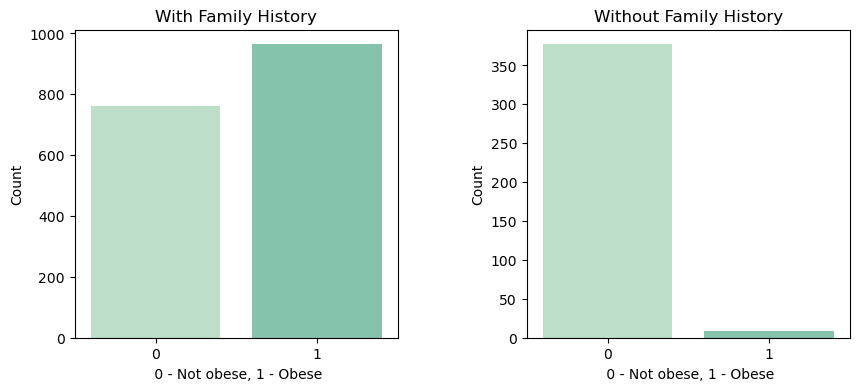

In [11]:
colors = ["#B7E4C7", "#7BCDAE"]

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
plt.subplots_adjust(wspace=0.4)

# Plot the countplot for individuals with a family history of being overweight
sns.countplot(data=with_family_history, x='NObeyesdad', ax=ax[0], palette=colors)
ax[0].set_title('With Family History')
ax[0].set_xlabel(' 0 - Not obese, 1 - Obese')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=0)

# Plot the countplot for individuals without a family history of being overweight
sns.countplot(data=without_family_history, x='NObeyesdad', ax=ax[1], palette=colors)
ax[1].set_title('Without Family History')
ax[1].set_xlabel(' 0 - Not obese, 1 - Obese')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', rotation=0)


plt.show()


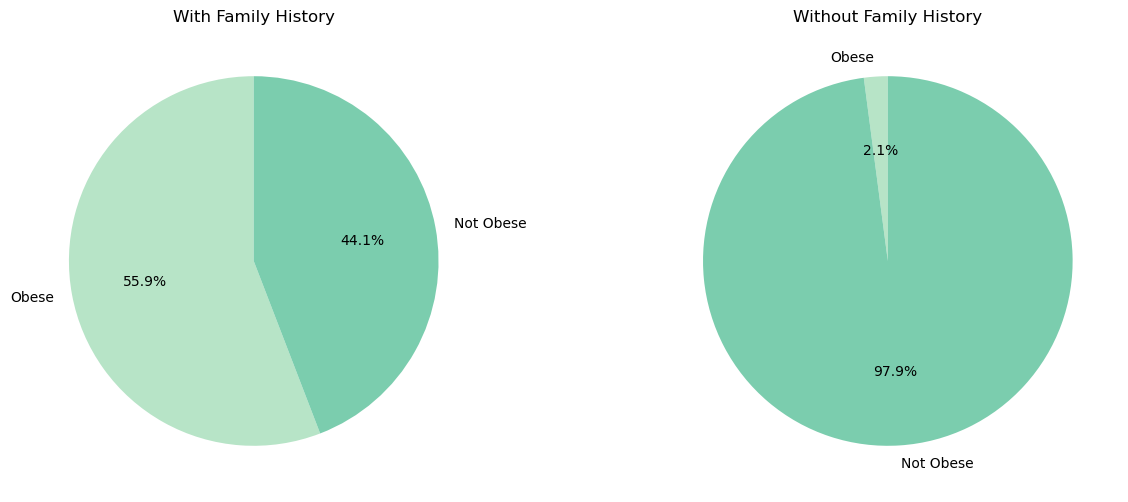

In [12]:
# Count the occurrences of each category in the 'NObeyesdad' column for with_family_history
obesity_counts_with = with_family_history['NObeyesdad'].value_counts()

# Count the occurrences of each category in the 'NObeyesdad' column for without_family_history
obesity_counts_without = without_family_history['NObeyesdad'].value_counts()

# Map the counts to 'Obese' and 'Not Obese' labels
labels = ['Obese', 'Not Obese']

# Prepare data for the first pie chart (with family history)
sizes_with = [obesity_counts_with.get(1, 0), obesity_counts_with.get(0, 0)]

# Prepare data for the second pie chart (without family history)
sizes_without = [obesity_counts_without.get(1, 0), obesity_counts_without.get(0, 0)]

# Create subplots with 1 row and 2 columns
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot first pie chart (with family history)
ax[0].pie(sizes_with, labels=labels, autopct='%1.1f%%', colors= colors, startangle=90)
ax[0].set_title('With Family History')

# Plot second pie chart (without family history)
ax[1].pie(sizes_without, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax[1].set_title('Without Family History')

plt.show()
